In [157]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Read CSV file
import pandas as pd

# Plotting library
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# Feature engineering
import math

# tells matplotlib to embed plots within the notebook
%matplotlib inline

### Load in data and feature engineering

In [158]:
# import training CSV
fname = './data/train.csv'
# use pandas to read the CSV properly of all different types
data_pd = pd.read_csv(fname)
# convert to a numpy array
data = np.array(data_pd)
# remove categorical data - force cast attempt then remove failures
cols_to_remove = []
for i in range(data.shape[1]):
    try:
        data[:,i] = data[:,i].astype(float)
    except:
        cols_to_remove.append(i)

data = np.delete(data, cols_to_remove, axis=1)
# remove rows with nan values
rows_to_remove = []
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        if math.isnan(data[i,j]):
            rows_to_remove.append(i)
            break

data = np.delete(data, rows_to_remove, axis=0)

# remove outliers with standard deviation TODO()

# take the actual prices and add them to results y
y = data[:, data.shape[1] - 1]
# remove prices column from data
data = np.delete(data, data.shape[1] - 1, 1)
data = data.astype(float)
print("data shape", data.shape)

pd.DataFrame(data)

data shape (1121, 37)


,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,1456.0,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,...,460.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0
1117,1457.0,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,...,500.0,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0
1118,1458.0,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,...,252.0,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0
1119,1459.0,20.0,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,...,240.0,366.0,0.0,112.0,0.0,0.0,0.0,0.0,4.0,2010.0


### Feature normalization

In [159]:
# [CHECKPOINT 5][5 points]
def  feature_normalization(X):
    """
    Normalizes the features in X. returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when working with
    learning algorithms.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n).
    
    Returns
    -------
    X_norm : array_like
        The normalized dataset of shape (m x n).
    
    Instructions
    ------------
    First, for each feature dimension, compute the mean of the feature
    and subtract it from the dataset, storing the mean value in mu. 
    Next, compute the  standard deviation of each feature and divide
    each feature by it's standard deviation, storing the standard deviation 
    in sigma. 
    
    Note that X is a matrix where each column is a feature and each row is
    an example. You needto perform the normalization separately for each feature. 
    
    Hint
    ----
    You might find the 'np.mean' and 'np.std' functions useful.
    """
    mu = []
    sigma = []
    X_norm = np.copy(X)
    
    col_to_remove = []
    for i in range(X_norm.shape[1]):
        mu.append(np.mean(X_norm[:,i]))
        sigma.append(np.std(X_norm[:,i]))
    X_norm = np.delete(X_norm, col_to_remove, axis=1)

    # =========================== YOUR CODE HERE =====================
    for i in range(X_norm.shape[1]):
        if np.std(X_norm[:,i]) != 0:
            X_norm[:,i] = (X_norm[:,i] - np.mean(X_norm[:,i])) / np.std(X_norm[:,i])
        else:
            X_norm[:,i] = (X_norm[:,i] - np.mean(X_norm[:,i])) / 0.01
    
    
    # ================================================================
    return X_norm, mu, sigma

### Normalize Data

In [160]:
normal_data, mu, sigma = feature_normalization(data)
# replace example # column with 1's intercept column
normal_data[:,0] = np.ones(data.shape[0])
pd.DataFrame(normal_data)

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,1.0,0.092295,-0.233570,-0.205885,0.570704,-0.525499,0.992930,0.823953,0.462009,0.571581,...,0.235641,-0.760257,0.231036,-0.356622,-0.11253,-0.278676,-0.072999,-0.141407,-1.615345,0.153084
1,1.0,-0.865696,0.384834,-0.064358,-0.153825,2.284122,0.120665,-0.460746,-0.572748,1.152559,...,-0.224712,1.686090,-0.716739,-0.356622,-0.11253,-0.278676,-0.072999,-0.141407,-0.498715,-0.596291
2,1.0,0.092295,-0.109889,0.138702,0.570704,-0.525499,0.928317,0.776371,0.282510,0.101672,...,0.549518,-0.760257,-0.064173,-0.356622,-0.11253,-0.278676,-0.072999,-0.141407,0.990125,0.153084
3,1.0,0.331793,-0.439705,-0.070512,0.570704,-0.525499,-1.850006,-0.746235,-0.572748,-0.475034,...,0.727382,-0.760257,-0.172934,4.083851,-0.11253,-0.278676,-0.072999,-0.141407,-1.615345,-1.345665
4,1.0,0.092295,0.549742,0.509132,1.295234,-0.525499,0.896011,0.681208,1.275032,0.462647,...,1.742250,0.815913,0.588393,-0.356622,-0.11253,-0.278676,-0.072999,-0.141407,2.106755,0.153084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,1.0,0.092295,-0.357251,-0.271480,-0.153825,-0.525499,0.863705,0.681208,-0.572748,-0.936399,...,-0.224712,-0.760257,-0.095247,-0.356622,-0.11253,-0.278676,-0.072999,-0.141407,0.617915,-0.596291
1117,1.0,-0.865696,0.590968,0.375605,-0.153825,0.411042,0.185277,0.110231,0.055497,0.751000,...,-0.015461,2.104761,-0.716739,-0.356622,-0.11253,-0.278676,-0.072999,-0.141407,-1.615345,1.651832
1118,1.0,0.331793,-0.192343,-0.133030,0.570704,3.220663,-1.010048,0.966697,-0.572748,-0.349013,...,-1.312819,-0.760257,0.215498,-0.356622,-0.11253,-0.278676,-0.072999,14.947388,-0.498715,1.651832
1119,1.0,-0.865696,-0.109889,-0.049960,-0.878355,0.411042,-0.719293,0.490883,-0.572748,-0.831738,...,-1.375594,2.244317,-0.716739,1.471808,-0.11253,-0.278676,-0.072999,-0.141407,-0.870925,1.651832


### Gradient Descent

In [161]:
def compute_cost_multiple(X, y, theta):
    """
    Compute cost for linear regression with multiple variables.
    Computes the cost of using theta as the parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    Returns
    -------
    J : float
        The value of the cost function. 
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to the cost.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    #number of features
    n = X.shape[1]
    
    # You need to return the following variable correctly
    J = 0
        
    # ======================= YOUR CODE HERE ==========================
    outerSum = 0
    for i in range(m):
        innerSum = 0
        for j in range(n):
            innerSum += theta[j] * X[:,j][i]
        innerSum -= y[i]
        innerSum **= 2
        outerSum += innerSum
    
    J = (1 / (2 * m)) * outerSum
            
    return J



In [162]:
# [CHECKPOINT 7][8 points]
def gradient_descent_multiple(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn theta.
    Updates theta by taking num_iters gradient steps with learning rate alpha.
        
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    alpha : float
        The learning rate for gradient descent. 
    
    num_iters : int
        The number of iterations to run gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    # Initialize some useful values
    m = y.shape[0]
    
    # Number of training sets and theta values
    n = X.shape[1]
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    
    J_history = []
    
    for it in range(num_iters):
        #partialDerivate = 0
        # ======================= YOUR CODE HERE ==========================
        for j in range(n): #for each theta to be changed
            partialDerivativeSum = 0
            for i in range(m): # PD sum
                hypothesisSum = 0
                for k in range(n): # for hypothesis calcs
                    #theta 0 * X[:,0][i] + theta1 * X[:,1][i] ...>
                    hypothesisSum += theta[k] * X[:,k][i]
                partialDerivativeSum += (hypothesisSum - y[i])*X[:,j][i]
            partialDerivative = (1 / m) * partialDerivativeSum
            theta[j] -= (alpha * partialDerivative)
        # =================================================================
        
        # save the cost J in every iteration
        J_history.append(compute_cost_multiple(X, y, theta))
    
    return theta, J_history

### Train model and learning rates

theta computed from gradient descent: [ 1.85499650e+05 -8.04198609e+03 -2.56471641e+03  4.37605553e+03
  2.54505926e+04  4.97508058e+03  7.52235818e+03  3.48493404e+03
  6.17744862e+03  5.00803662e+03  1.72060874e+02 -9.67797367e+02
  4.10026720e+03  7.24524990e+03  8.76336537e+03  2.77165924e+02
  1.21345263e+04  4.53101107e+03  5.60219449e+02  3.88592893e+03
  1.82398194e+02 -7.45837777e+03 -4.68595684e+03  8.80113972e+03
  3.16600344e+03 -4.81651635e+02  9.99673459e+03  2.14934778e+03
  2.66298757e+03 -2.67755570e+02  2.55735500e+02  1.00750235e+03
  3.31355380e+03 -2.51892061e+03 -6.74893027e+02 -5.42365920e+02
 -3.84460695e+02]


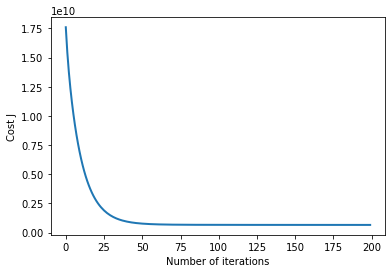

In [163]:
# Choose some alpha value - change this
alpha = 0.05
num_iters = 200

# init theta and run gradient descent
theta = np.zeros(normal_data.shape[1])
theta, J_history = gradient_descent_multiple(normal_data, y, theta, alpha, num_iters)

# Plot the convergence graph
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))

### Make predictions using theta and gather error

In [177]:
prediction = []
accuracy = []
for i in range(normal_data.shape[0]):
    predict = np.matmul(np.transpose(theta), normal_data[i,:])
    prediction.append(predict)
    diff = np.abs(y[i] - predict)
    accuracy.append(1 - (diff / y[i]))

print("mean accuracy of prediction: ", np.mean(accuracy))
print("predictions: ")
print(pd.DataFrame(prediction))

mean accuracy of prediction:  0.8726193755882231
predictions: 
                  0
0     231992.213607
1     196460.513633
2     225568.125026
3     201406.975064
4     298982.709000
...             ...
1116  183371.530622
1117  247252.848479
1118  219148.602504
1119  131929.803272
1120  150043.103184

[1121 rows x 1 columns]
